# Computer Vision - P3


## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): November 10th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

In Video Segmentation:

3.1. Segmentation of video shots with static scenes.

3.2. Background substraction.

In Image Segmentation:

3.3. Segmentation of images.

To successfuly complete this practicum it is necessary to understand the following theory concepts: video segmentation, background substraction, K-means clustering, different image segmentation approaches,...

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)


Note: One of the applications of the backgroun substraction methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Today, most of videoconference tools allow to put a virtual background. Thus, they need to extract the person (the foreground) and to put it on the new virtual background.


## 3.1 Segmentation of video shots

Read and visualize the sequence of images "images/Barcelona-sequence".

Hint: In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html).

Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [45]:
%matplotlib inline

<IPython.core.display.Javascript object>


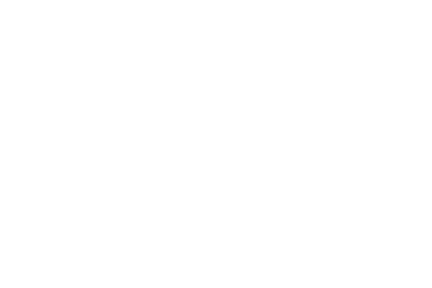

<IPython.core.display.Javascript object>


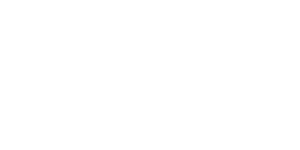

In [46]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder


%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=True, frames=50, repeat= False)
plt.show()

a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. 

To solve this exercise, you need to create a **temporal plot** showing a frame by frame measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

In [9]:
# Your soluction here

Additionally, create an interactive plot executing the following code in "Example A". This created **temporal plot** should replace the temporal plot given as a template. 

<IPython.core.display.Javascript object>


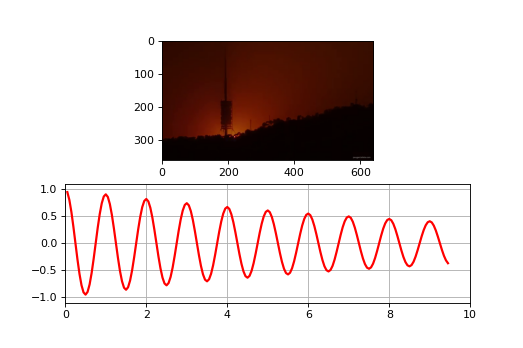

In [10]:
# Example A
# Sinusoidal plot points generation
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

In [11]:
# Your soluction here

b) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


**Hint:**
Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize the initial and final frames.


In [1]:
# Your soluction here

c) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

d) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

In [47]:
from skimage.exposure import histogram
from skimage import img_as_float, io

# We define a function that takes an image,
# converts it into float and returns its
# three histograms (one for each channel)

def data(image, nbins):
    image = img_as_float(image)
    return [histogram(image[:,:,rgb], nbins)[0] for rgb in range(3)]

#Returns index of the scenes
def get_scenes(images, threshold = 1000): 
    scenes = [0]
    for i in range(2, len(images)):
        difference = [abs(data(images[i], 8)[rgb] - data(images[i-1], 8)[rgb]) for rgb in range (3)]
        
        if np.mean(difference) > threshold:
            scenes.append(i - 1)
            scenes.append(i)            
    # get last frame
    scenes.append(len(images) - 1)
    
    return scenes

## 3.2 Background subtraction

Apply the background subtraction algorithm (check theory material).

a) Visualize the following images for each different scene (there are 3) of the video:

    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [48]:
# This function will plot the original, background and foreground image
def show_imgs(original, background, foregorund, scene_num):
    # Struct of plots
    fig, axarr = plt.subplots(1,3, figsize=(15,15))    
    
    # Adding original image
    axarr[0].imshow(original, cmap='gray') 
    # Adding title
    axarr[0].set_title("Original img " + str(scene_num))    
    # Removing axis
    axarr[0].axis('off')
    
    # Adding background image
    axarr[1].imshow(background, cmap='gray') 
    # Adding title
    axarr[1].set_title("Background Image " + str(scene_num))    
    # Removing axis
    axarr[1].axis('off')
    
    # Adding foreground image
    axarr[2].imshow(foregorund, cmap="gray") 
    # Adding title
    axarr[2].set_title("Foreground Image " + str(scene_num))
    # Removing axis
    axarr[2].axis('off')
    
    plt.show() 

In [49]:
from skimage.color import rgb2gray

# This function will get the background and extract the foreground
def get_background_foreground(images,start, finish, threshold = 0.1):
    # Create a black background
    background = np.zeros(images[0].shape)
    
    # List with all the images of the scenes
    frames = []
    
    # List to save float images to each channel
    frames_channels = [[],[],[]]
    
    # Iterate all the frames
    for i in range(start, finish+1):
        # Pass all frames to float
        frames.append(img_as_float(images[i]))
        
        # Same to all the channels
        for j in range(3):
            frames_channels[j] += [img_as_float(images[i][:, :, j])]
    
    # Get the median of all the frames
    for i in range(3):
        background[:,:,i] = np.median(frames_channels[i], axis=0)
    
    # To get the foreground we just need to get the first frame and remove the background
    foreground = np.abs(frames[0] - background)
    
    # Pass to gray levels
    foreground_gray = rgb2gray(foreground)
    
    # Binarizating foreground to visualizate it better
    foreground_gray[foreground_gray <= threshold] = 0
    foreground_gray[foreground_gray > threshold] = 1
    
    foreground_gray = rgb2gray(foreground)
    
    return background, foreground, foreground_gray
    

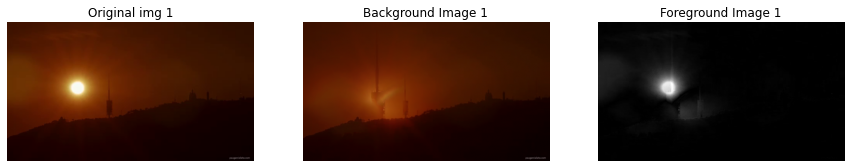

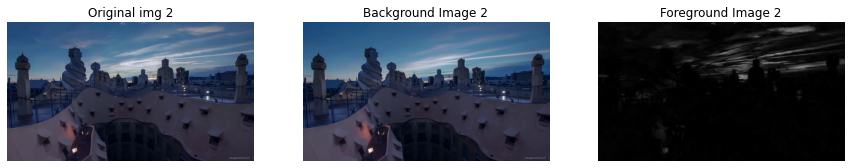

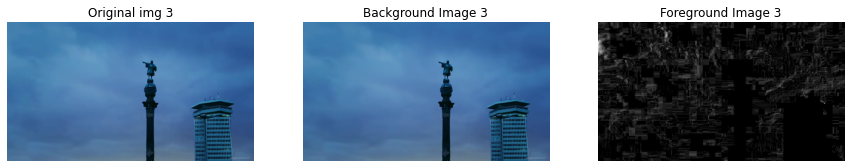

In [50]:
%matplotlib inline

# Scene counter
num = 1
# Get all the scenes of the video
scenes = get_scenes(ic, 22120)

for i in range(0, len(scenes), 2):
    # Get background, foreground and foreground in gray levels
    bg, fg, aux = get_background_foreground(ic, scenes[i], scenes[i+1], 0.2)
    # Plot every result
    show_imgs(ic[scenes[i]], bg, aux, num)
    num += 1

b) Comment your implementation including details. 

c) Answer the following questions:

- What happens if the shots are not correctly extracted?
<br></br>
By not being extracted correctly, different scenes could be put together and that would make the average of the images erroneous
<br></br>
- What happens if you find too many shots in the video? 
<br></br>
Apart from the fact that it would take a long time, when making the average I would have more images in consideration and the result would not be so accurate.
<br></br>
- What do the static background images represent? 
<br></br>
They represent the pixels that have not moved in all the frames of the scene
<br></br>
- In which situations does the algorithm work and in which it does not? 
<br></br>
In the case of having a blurred image or with much noise or even with many dynamic elements the result would not be so precise
<br></br>
- What happens if you substract the background image from the original one?
<br></br>
The foreground is obtained
<br></br>
- Do you see any additional application for this algorithm?
<br></br>
It could be useful to determine mobile objects in a video
<br></br>

d) **[OPTIONAL]**
- Apply the algorithm to some other static video that you found.

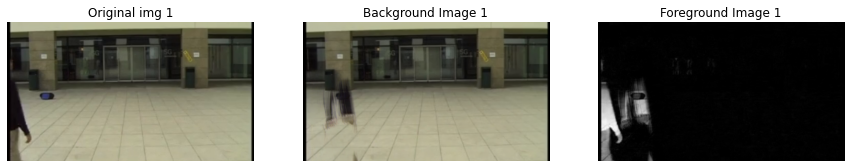

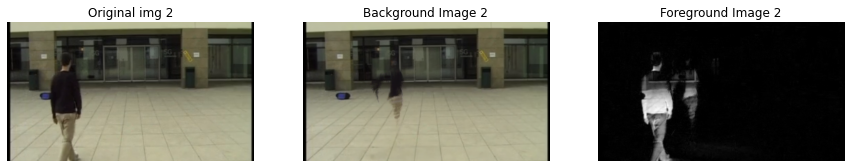

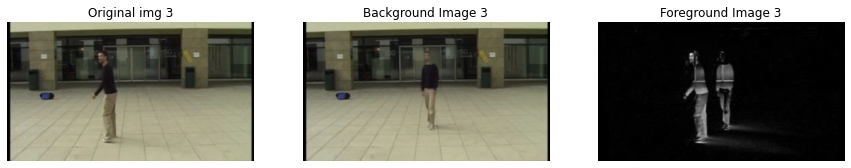

In [42]:
# Your soluction here
%matplotlib inline

ic = io.ImageCollection('images/epfl-sequence/*.png')

# Get all the scenes of the video
scenes = get_scenes(ic, 22120)
# Scene counter
num = 1
for i in range(0, len(scenes), 2):
    # Get background, foreground and foreground in gray levels
    bg, fg, aux = get_background_foreground(ic, scenes[i], scenes[i+1], 0.2)
    # Plot every result
    show_imgs(ic[scenes[i]], bg, aux, num)
    num += 1

## 3.3 Segmentation of images

Apply different clustering methods for image segmentation on the RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)

a) Read 'loro.png' image from the folder 'images' and segment it using Felzenszwalbs's method. 


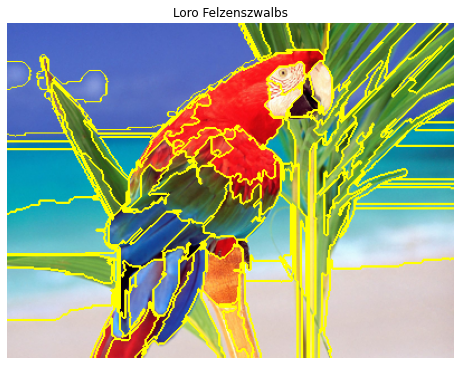

In [18]:
%matplotlib inline
from skimage.segmentation import felzenszwalb, slic, quickshift

image = io.imread('images/loro.png')
image_felz = felzenszwalb(image, scale=110, sigma=1, min_size=200)
res = mark_boundaries(image, image_felz)

# Struct of plots
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1, 1)
ax.title.set_text('Loro Felzenszwalbs')
plt.axis('off')
plt.imshow(res)

plt.show()

b) Test different parameters in order to obtain a good image segmentation. 
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?


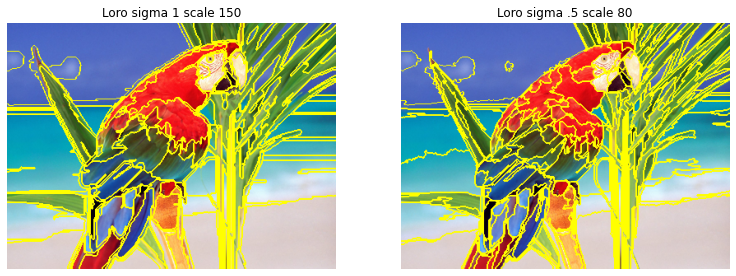

In [24]:
'''
Contestar preguntas
'''
felz_scale = felzenszwalb(image, scale=150, sigma=1, min_size=50)
felz_sigma = felzenszwalb(image, scale=80, sigma=.5, min_size=50)

felz_scale = mark_boundaries(image, felz_scale)
felz_sigma = mark_boundaries(image, felz_sigma)


# Struct of plots
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,3, 1)
ax.title.set_text('Loro sigma 1 scale 150')
plt.axis('off')
plt.imshow(felz_scale)

ax = fig.add_subplot(1,3, 2)
ax.title.set_text('Loro sigma .5 scale 80')
plt.axis('off')
plt.imshow(felz_sigma)

plt.show()

c) Comment what algorithm is the method based in up to 3 lines most.

The algorithm uses a graph and splits it into different components. The division uses a difference between the two components with the closest distance.

d) Segment the same image using SLIC algorithm. 

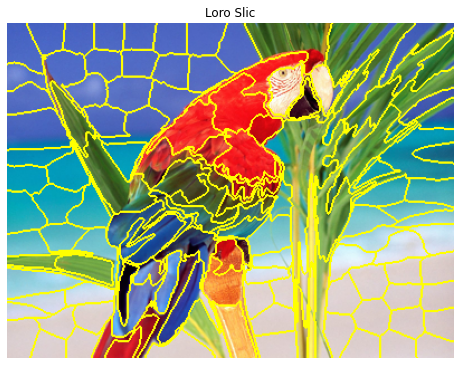

In [17]:
loro_slic = slic(image, n_segments=180, compactness=7, sigma=1.5, start_label=1)
loro_slic = mark_boundaries(image, loro_slic)

# Struct of plots
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1, 1)
ax.title.set_text('Loro Slic')
plt.axis('off')
plt.imshow(loro_slic)

plt.show()

e) Test different parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

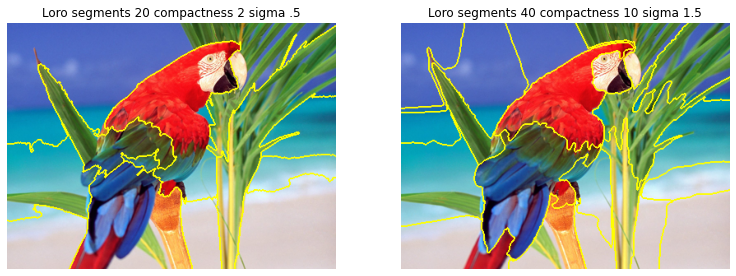

In [30]:
'''
Contestar preguntas
'''
loro_seg = slic(image, n_segments=20, compactness=2, sigma=.5, start_label=1)
loro_compact = slic(image, n_segments=40, compactness=10, sigma=1.5, start_label=1)

loro_seg = mark_boundaries(image, loro_seg)
loro_compact = mark_boundaries(image, loro_compact)

# Struct of plots
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,3, 1)
ax.title.set_text('Loro segments 20 compactness 2 sigma .5')
plt.axis('off')
plt.imshow(loro_seg)

ax = fig.add_subplot(1,3, 2)
ax.title.set_text('Loro segments 40 compactness 10 sigma 1.5')
plt.axis('off')
plt.imshow(loro_compact)

plt.show()

f) Segment the same image using the Quickshift algorithm. 

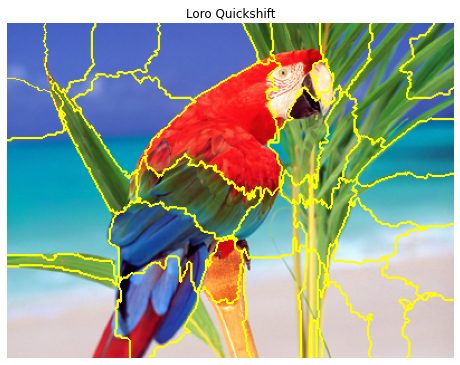

In [20]:
loro_quick = quickshift(image, kernel_size=10, ratio=0.01)
loro_quick = mark_boundaries(image, loro_quick)

# Struct of plots
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1, 1)
ax.title.set_text('Loro Quickshift')
plt.axis('off')
plt.imshow(loro_quick)

plt.show()

g) Test different parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

In [ ]:
'''
Contestar preguntas
'''
loro_seg = slic(image, n_segments=20, compactness=2, sigma=.5, start_label=1)
loro_compact = slic(image, n_segments=40, compactness=10, sigma=1.5, start_label=1)

loro_seg = mark_boundaries(image, loro_seg)
loro_compact = mark_boundaries(image, loro_compact)

# Struct of plots
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,3, 1)
ax.title.set_text('Loro segments 20 compactness 2 sigma .5')
plt.axis('off')
plt.imshow(loro_seg)

ax = fig.add_subplot(1,3, 2)
ax.title.set_text('Loro segments 40 compactness 10 sigma 1.5')
plt.axis('off')
plt.imshow(loro_compact)

plt.show()

h) Comment what algorithm is the method based in up to 3 lines.

i) Plot the original image and the results of both algorithms in a 1x3 subplot. 



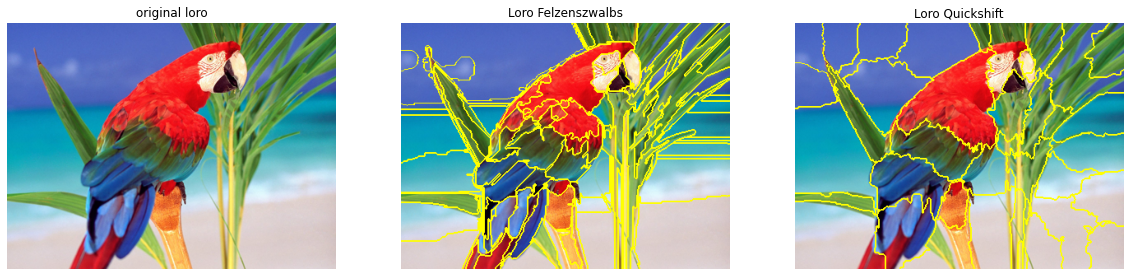

In [32]:
# Struct of plots
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,3, 1)
ax.title.set_text('original loro')
plt.axis('off')
plt.imshow(image)

ax = fig.add_subplot(1,3, 2)
ax.title.set_text('Loro Felzenszwalbs')
plt.axis('off')
plt.imshow(res)

ax = fig.add_subplot(1,3, 3)
ax.title.set_text('Loro Quickshift')
plt.axis('off')
plt.imshow(loro_quick)

plt.show()

j) Calculate also the number of segments obtained on the image by each of the algorithms. 

k) Comment the differences between each method as well as their advantages and disadvantages.